In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# EXPLORATORY DATA ANALYSIS

# Task
Perform feature engineering on the dataframe `df`.

## Identify categorical variables

### Subtask:
Determine which columns in `df` are categorical and need encoding.


**Reasoning**:
Print the data types of all columns in the DataFrame `df` to identify categorical columns.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Reasoning**:
Examine the head of the DataFrame to identify categorical columns with binary or multiple string values.



In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## One-hot encoding

### Subtask:
Apply one-hot encoding to the identified categorical variables to convert them into numerical format.


**Reasoning**:
Identify the categorical columns that require one-hot encoding (those with more than two unique values), apply one-hot encoding using `pd.get_dummies`, and then concatenate the results with the original DataFrame while dropping the original categorical columns.



In [ ]:
# Identify categorical columns with more than two unique values
categorical_cols = ['furnishingstatus']

# Apply one-hot encoding to the identified columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the new DataFrame
display(df_encoded.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,False,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,False,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,True,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,False,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,False,False


## Handle binary variables

### Subtask:
Convert binary categorical variables (like 'yes'/'no') into numerical representations (e.g., 1/0).


**Reasoning**:
Convert the binary categorical columns in `df_encoded` to numerical representation (1s and 0s).



In [ ]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'yes': 1, 'no': 0})

display(df_encoded.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


## Feature scaling

### Subtask:
Scale numerical features in `df` if necessary, to ensure they are on a similar range for the model.


**Reasoning**:
Scale the numerical features 'price' and 'area' in the dataframe `df_encoded` using MinMaxScaler to bring them into a similar range.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns to scale
numerical_cols = ['price', 'area']

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler to numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the scaled DataFrame
display(df_encoded.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,False,False
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,False,False
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,True,False
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,False,False
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,False,False


## Combine features

### Subtask:
Combine the original numerical features, encoded categorical features, and handled binary features into a single dataframe for model training.


**Reasoning**:
Display the head and info of `df_encoded` to confirm its structure and data types, fulfilling the final step of the subtask.



In [ ]:
display(df_encoded.head())
display(df_encoded.info())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,False,False
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,False,False
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,True,False
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,False,False
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    float64
 1   area                             545 non-null    float64
 2   bedrooms                         545 non-null    int64  
 3   bathrooms                        545 non-null    int64  
 4   stories                          545 non-null    int64  
 5   mainroad                         545 non-null    int64  
 6   guestroom                        545 non-null    int64  
 7   basement                         545 non-null    int64  
 8   hotwaterheating                  545 non-null    int64  
 9   airconditioning                  545 non-null    int64  
 10  parking                          545 non-null    int64  
 11  prefarea                         545 non-null    int64  
 12  furnishingstatus_semi-

None

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error (MSE): 1754318687330.6633
R-squared Score: 0.6529242642153185


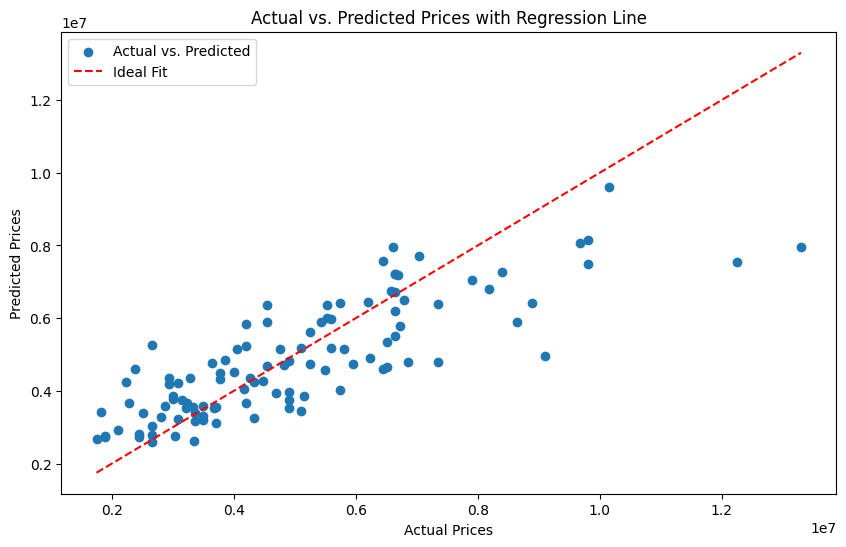

In [ ]:
# Plot actual vs. predicted prices with a regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=1, label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices with Regression Line")
plt.legend()
plt.show()

# Task
Perform simple linear regression using only two columns from the dataframe `df_encoded`.

## Select features

### Subtask:
Choose the two columns from the `df_encoded` dataframe to use for the simple linear regression.


**Reasoning**:
Select the 'area' column as the feature and the 'price' column as the target variable for simple linear regression and reshape the feature into a 2D array.



In [ ]:
X_simple = df_encoded['area'].values.reshape(-1, 1)
y_simple = df_encoded['price']

## Split data

### Subtask:
Split the selected features and the target variable into training and testing sets.


**Reasoning**:
Split the selected features and target variable into training and testing sets.



In [ ]:
X_simple_train, X_simple_test, y_simple_train, y_simple_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

display(X_simple_train[:5])
display(X_simple_test[:5])
display(y_simple_train.head())
display(y_simple_test.head())

array([[6000],
       [7200],
       [3816],
       [2610],
       [3750]])

array([[5900],
       [6500],
       [4040],
       [5000],
       [3960]])

,price
46,7525000
93,6300000
335,3920000
412,3430000
471,3010000


,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000


## Model training

### Subtask:
Train a Linear Regression model using the training data with only the selected features.


**Reasoning**:
Instantiate a Linear Regression model and train it on the simple training data.



In [ ]:
model_simple = LinearRegression()
model_simple.fit(X_simple_train, y_simple_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the trained model using the testing data and calculate relevant metrics.


**Reasoning**:
Evaluate the trained simple Linear Regression model using the testing data by making predictions and calculating MSE and R-squared.



In [ ]:
# Make predictions on the testing data
y_simple_pred = model_simple.predict(X_simple_test)

# Calculate Mean Squared Error (MSE)
mse_simple = mean_squared_error(y_simple_test, y_simple_pred)

# Calculate R-squared score
r2_simple = r2_score(y_simple_test, y_simple_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE) for Simple Linear Regression: {mse_simple}")
print(f"R-squared Score for Simple Linear Regression: {r2_simple}")

Mean Squared Error (MSE) for Simple Linear Regression: 3675286604768.185
R-squared Score for Simple Linear Regression: 0.27287851871974644


## Visualize results

### Subtask:
Plot the simple linear regression model's fit on the data.


**Reasoning**:
Create a scatter plot of the actual test data and add the regression line to visualize the model's fit.



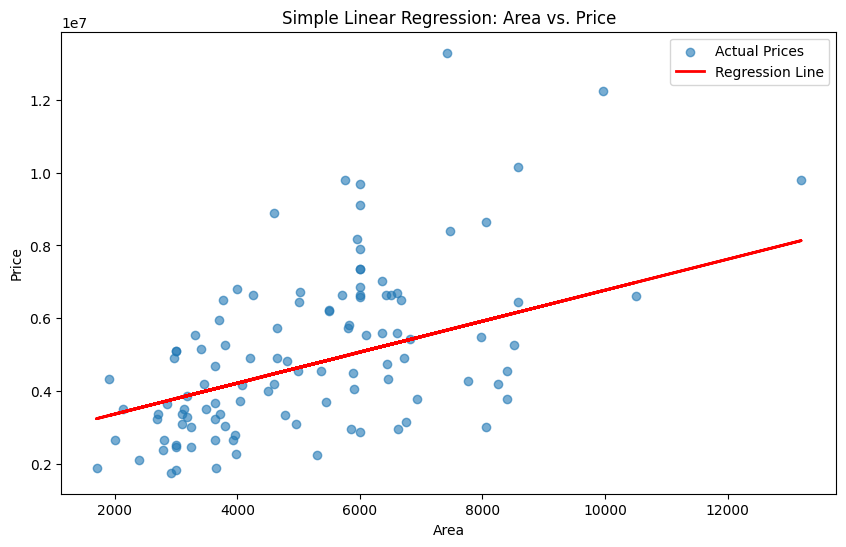

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_simple_test, y_simple_test, alpha=0.6, label='Actual Prices')
plt.plot(X_simple_test, y_simple_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs. Price")
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Simple linear regression using only the 'area' feature to predict 'price' resulted in a Mean Squared Error (MSE) of approximately \$3.68 trillion and an R-squared score of approximately 0.273.
*   The R-squared score of 0.273 indicates that the 'area' feature explains only about 27.3% of the variance in the 'price'.
*   The scatter plot visualizing the simple linear regression model's fit shows the regression line attempting to capture the trend between 'area' and 'price', but the significant spread of actual data points around the line is visually apparent, aligning with the low R-squared value.

### Insights or Next Steps

*   The simple linear regression model with 'area' as the sole predictor is not a strong predictor of 'price', suggesting that other factors significantly influence house prices.
*   To improve the model's performance, consider using multiple linear regression by including additional relevant features from the dataset.


## Split data

### Subtask:
Split the selected features and the target variable into training and testing sets.

**Reasoning**:
Split the selected features and target variable into training and testing sets.

In [ ]:
X_simple_train, X_simple_test, y_simple_train, y_simple_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

display(X_simple_train[:5])
display(X_simple_test[:5])
display(y_simple_train.head())
display(y_simple_test.head())

array([[6000],
       [7200],
       [3816],
       [2610],
       [3750]])

array([[5900],
       [6500],
       [4040],
       [5000],
       [3960]])

,price
46,7525000
93,6300000
335,3920000
412,3430000
471,3010000


,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000


## Model training

### Subtask:
Train a Linear Regression model using the training data with only the selected features.

**Reasoning**:
Instantiate a Linear Regression model and train it on the simple training data.

In [ ]:
model_simple = LinearRegression()
model_simple.fit(X_simple_train, y_simple_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the trained model using the testing data and calculate relevant metrics.

**Reasoning**:
Evaluate the trained simple Linear Regression model using the testing data by making predictions and calculating MSE and R-squared.

In [ ]:
# Make predictions on the testing data
y_simple_pred = model_simple.predict(X_simple_test)

# Calculate Mean Squared Error (MSE)
mse_simple = mean_squared_error(y_simple_test, y_simple_pred)

# Calculate R-squared score
r2_simple = r2_score(y_simple_test, y_simple_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE) for Simple Linear Regression: {mse_simple}")
print(f"R-squared Score for Simple Linear Regression: {r2_simple}")

Mean Squared Error (MSE) for Simple Linear Regression: 3675286604768.185
R-squared Score for Simple Linear Regression: 0.27287851871974644


## Visualize results

### Subtask:
Plot the simple linear regression model's fit on the data.

**Reasoning**:
Create a scatter plot of the actual test data and add the regression line to visualize the model's fit.

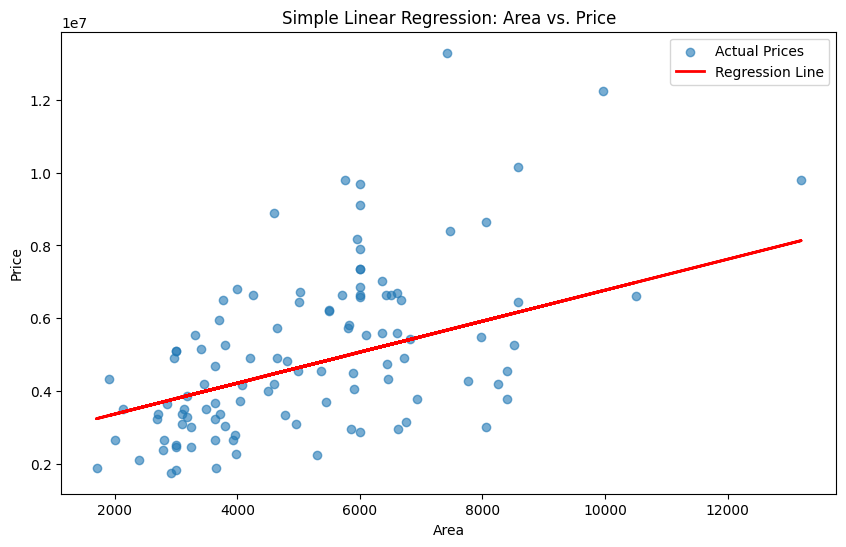

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_simple_test, y_simple_test, alpha=0.6, label='Actual Prices')
plt.plot(X_simple_test, y_simple_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs. Price")
plt.legend()
plt.show()

In [ ]:
# Get the coefficients of the model
coefficients = model.coef_

# Get the feature names from the training data
feature_names = X_train.columns

# Create a pandas Series to easily view coefficients with their corresponding feature names
coef_series = pd.Series(coefficients, index=feature_names)

# Print the coefficients
print("Model Coefficients:")
print(coef_series)

Model Coefficients:
area                               2.359688e+02
bedrooms                           7.677870e+04
bathrooms                          1.094445e+06
stories                            4.074766e+05
mainroad                           3.679199e+05
guestroom                          2.316100e+05
basement                           3.902512e+05
hotwaterheating                    6.846499e+05
airconditioning                    7.914267e+05
parking                            2.248419e+05
prefarea                           6.298906e+05
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64


# Task
Create a new column in the dataframe `df_encoded` that classifies houses based on whether their 'price' is above or below the median price. Then, perform a classification task on this dataset.

## Create price categories

### Subtask:
Calculate the median of the 'price' column and create a new binary column in the `df_encoded` dataframe to classify houses as above or below the median price.


**Reasoning**:
Calculate the median price, create the 'price_category' column based on the median, and display the head and value counts of the updated dataframe to complete the subtask.



In [ ]:
# Calculate the median of the 'price' column
median_price = df_encoded['price'].median()

# Create the 'price_category' column
df_encoded['price_category'] = (df_encoded['price'] > median_price).astype(int)

# Display the head of the updated DataFrame
display(df_encoded.head())

# Display the value counts of the new column
display(df_encoded['price_category'].value_counts())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_category
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False,1


,count
price_category,
0,275
1,270


## Split data for classification

### Subtask:
Split data for classification


**Reasoning**:
Define features and target for classification and split the data into training and testing sets.



In [ ]:
X_classification = df_encoded.drop(['price', 'price_category'], axis=1)
y_classification = df_encoded['price_category']

X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

display(X_train_classification.head())
display(y_train_classification.head())

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,0,0,0,1,1,0,False,False
93,7200,3,2,1,1,0,1,0,1,3,0,True,False
335,3816,2,1,1,1,0,1,0,1,2,0,False,False
412,2610,3,1,2,1,0,1,0,0,0,1,False,True
471,3750,3,1,2,1,0,0,0,0,0,0,False,True


,price_category
46,1
93,1
335,0
412,0
471,0


## Model training (classification)

### Subtask:
Train a classification model (e.g., Logistic Regression) using the training data.


**Reasoning**:
Train a Logistic Regression model using the training data.



In [ ]:
from sklearn.linear_model import LogisticRegression

model_classification = LogisticRegression()
model_classification.fit(X_train_classification, y_train_classification)

LogisticRegression()

**Reasoning**:
The model is trained, evaluate the trained model using the testing data and calculate relevant metrics.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Make predictions on the testing data
y_pred_classification = model_classification.predict(X_test_classification)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_classification, y_pred_classification)
precision = precision_score(y_test_classification, y_pred_classification)
recall = recall_score(y_test_classification, y_pred_classification)
f1 = f1_score(y_test_classification, y_pred_classification)
# roc_auc = roc_auc_score(y_test_classification, model_classification.predict_proba(X_test_classification)[:, 1])
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)


# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
# print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7981651376146789
Precision: 0.86
Recall: 0.7413793103448276
F1-score: 0.7962962962962963
Confusion Matrix:
[[44  7]
 [15 43]]


## Summary:

### Data Analysis Key Findings

*   A new binary column 'price\_category' was successfully created in the `df_encoded` dataframe, classifying houses based on whether their price is above (1) or below (0) the median price. There are 270 houses classified as above the median and 275 below.
*   The data was split into training and testing sets for classification, with the 'price\_category' column as the target variable.
*   A Logistic Regression model was trained on the classification training data and achieved an accuracy of approximately 0.798, a precision of 0.86, a recall of 0.741, and an F1-score of 0.796 on the test set.

### Insights or Next Steps

*   The Logistic Regression model shows a reasonable performance for classifying house prices relative to the median.
*   Explore other classification models and hyperparameter tuning to potentially improve the classification performance.
